In [3]:
from PIL import Image
from pytesseract import * 
pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [25]:

import fitz  # PyMuPDF
from PIL import Image
import pytesseract
import sys
import io

def extract_text_from_pdf(path):
    doc = fitz.open(path)
    full_text = []

    for page_num, page in enumerate(doc, start=1):
        # 먼저 텍스트 추출 시도
        text = page.get_text("text").strip()
        if text:
            full_text.append(text)
        else:
            # 텍스트가 없으면 이미지로 변환하여 OCR 수행
            try:
                pix = page.get_pixmap(dpi=300)  # 해상도 향상
                img = Image.open(io.BytesIO(pix.tobytes("png")))
                img = img.resize((2500, int(img.height * 2500 / img.width)), Image.LANCZOS)
                ocr = pytesseract.image_to_string(img, lang='eng+kor',)
                full_text.append(f"[페이지 {page_num} OCR 결과]\n" + ocr.strip())
            except Exception as e:
                full_text.append(f"[페이지 {page_num} OCR 실패]: {str(e)}")

    return "\n\n".join(full_text)

def extract_text_from_image(path):
    try:
        img = Image.open(path)
        text = pytesseract.image_to_string(img, lang='eng+kor')
        return text.strip()
    except Exception as e:
        return f"이미지 OCR 실패: {str(e)}"

def save_text_to_file(text, filename):
    with open(filename, 'w', encoding='utf-8') as f:
        f.write(text)

def main(image_file):
    # if len(sys.argv) < 2:
    #     print("사용법: python ocr_only.py 파일경로")
    #     sys.exit(1)
    #
    # path = sys.argv[1]
    path = r'sample\test.pdf'
    print(f"입력 파일 경로: {path}")

    if path.lower().endswith('.pdf'):
        text = extract_text_from_pdf(path)
    elif path.lower().endswith(('.png', '.jpg', '.jpeg', '.tif', '.bmp')):
        text = extract_text_from_image(path)
    else:
        print("지원하지 않는 파일 형식입니다.")
        sys.exit(1)

    print("\n=== 추출된 텍스트 ===\n")
    print(text)
    save_text_to_file(text, 'test.txt')

    return text;

if __name__ == "__main__":
    main('sample')
#코드 처음부터 다시 짜기
# pdf 가 이미지로 변환되었다면 변환된 이미지 확인하기


입력 파일 경로: sample\test.pdf

=== 추출된 텍스트 ===

[페이지 1 OCR 결과]
가 나 다 라 마 바사

애국가

동 해 물 과 백 두 산 이 마르고 닮 도록
하 느 님 이 보 우 하사 우리나라 만세
무궁화 삼천리 화 려 강산

대 한 사 람 대 한 으 로 길이 보 전 하 세

더 | 더 L


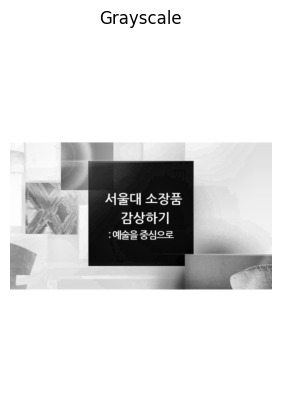

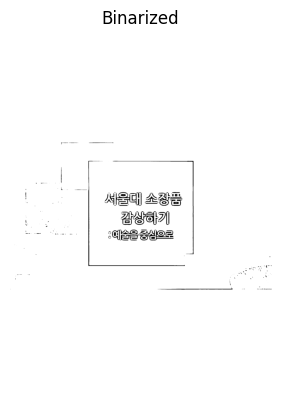

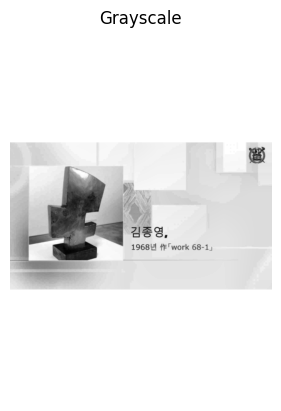

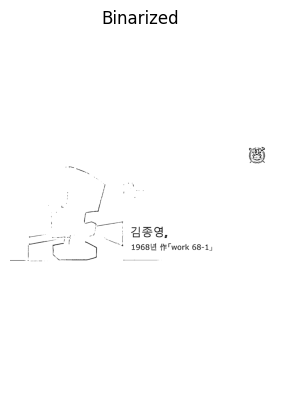

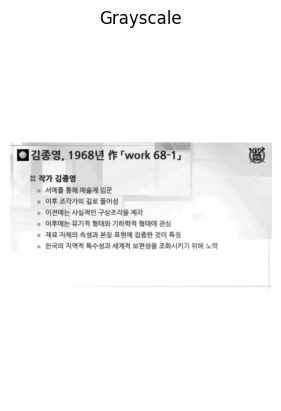

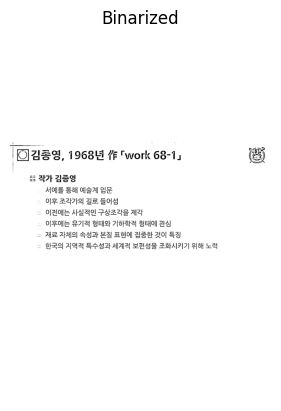

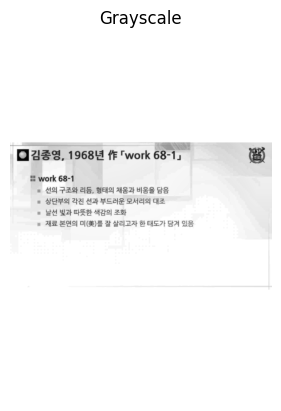

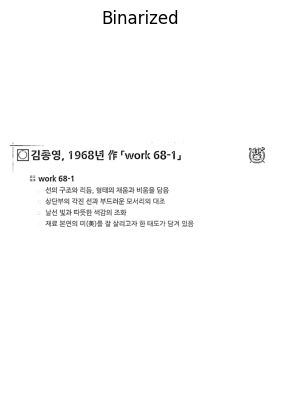

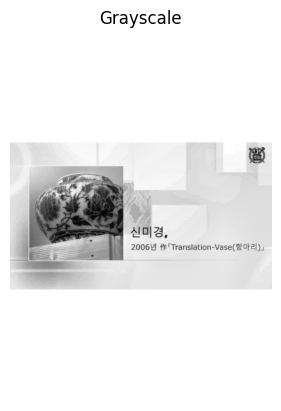

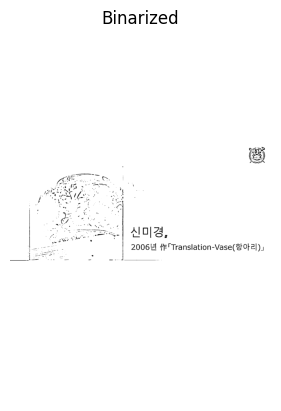

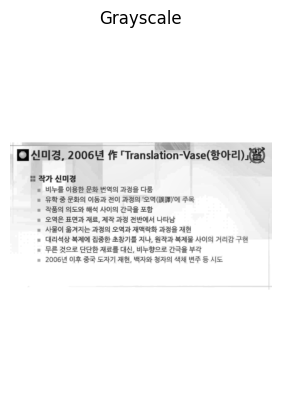

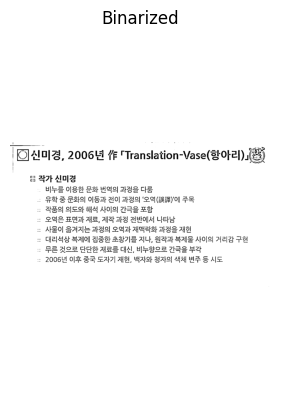

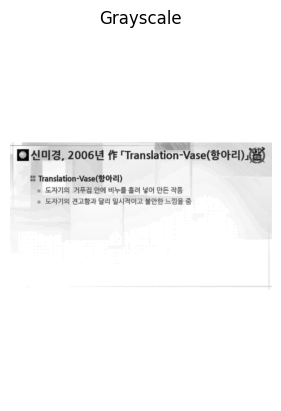

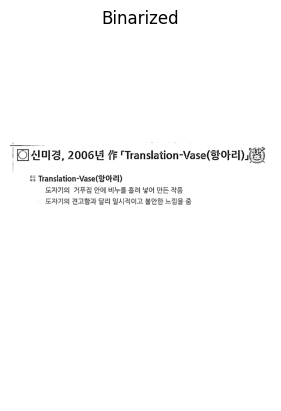

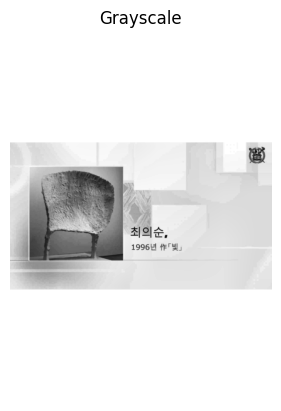

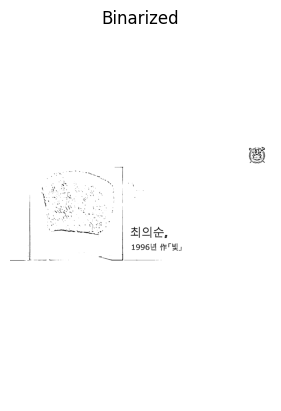

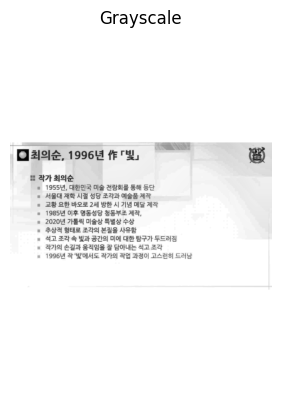

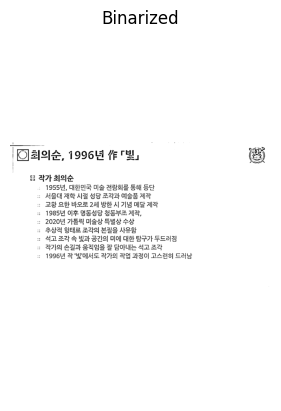

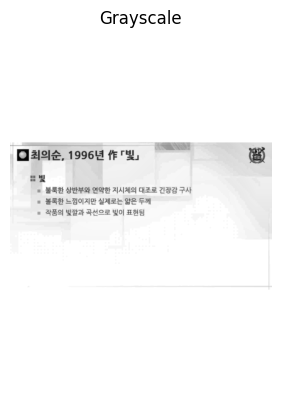

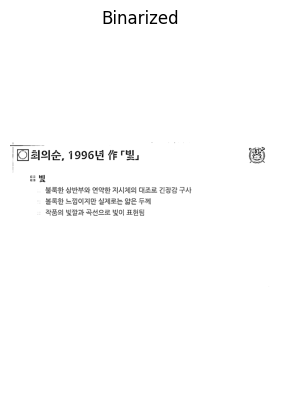

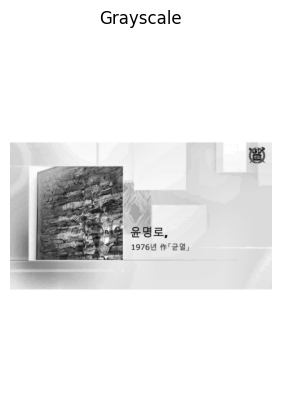

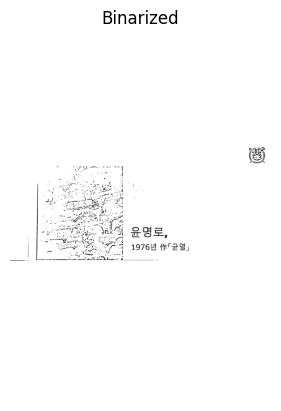

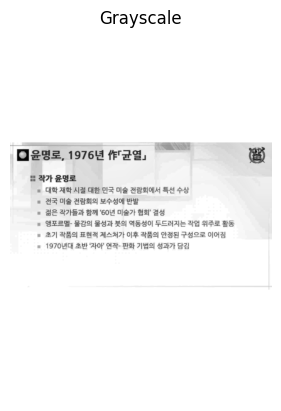

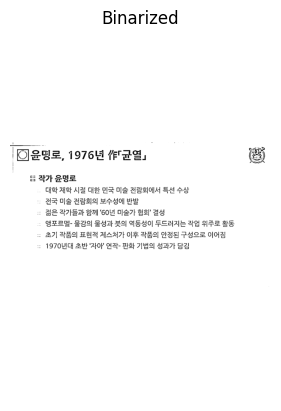

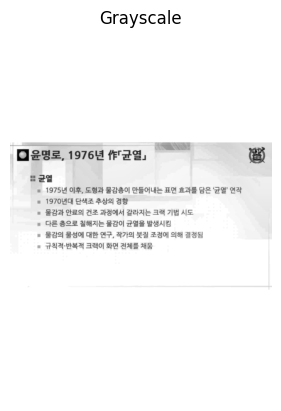

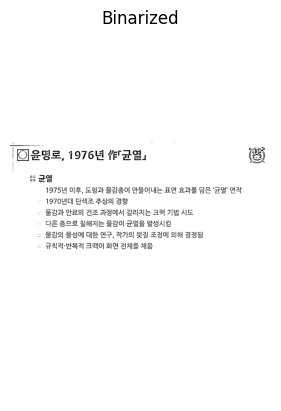

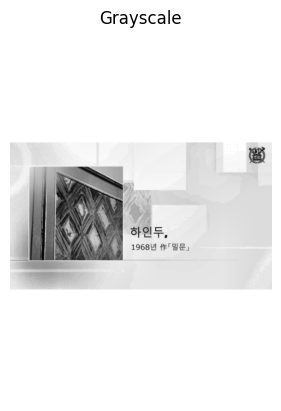

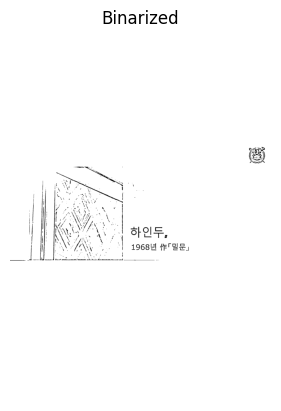

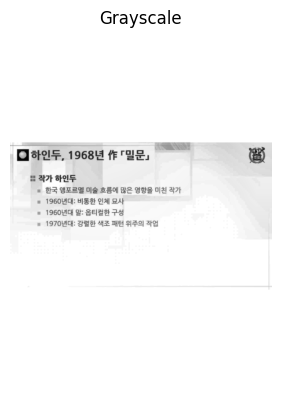

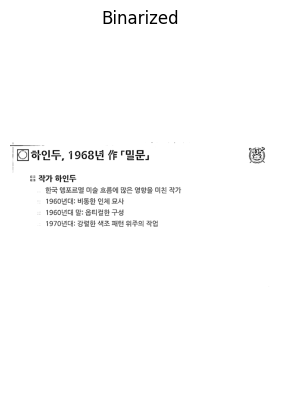

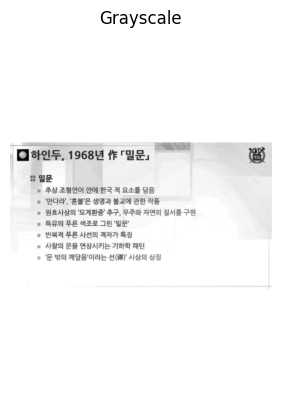

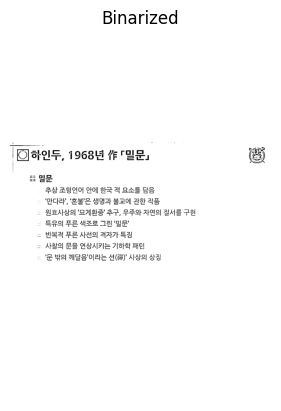

[페이지 1 OCR]
_ Bea
|

[페이지 2 OCR]
10

a
19684 fe work 68-1,

[페이지 3 OCR]


[페이지 4 OCR]
ie

운 모 서 리 의 대조

선과 부드러

work 68-1

HES 19684 (EF "work 68-1,

ca
ca

|
|
|
|

old

A

上

Lid

태 도 가

ot

rey

리 고 자

上

者
xi
niu
HK

上

: 재료 본 연 의 미 (

[페이지 5 OCR]
UE - 으 ete 《 . "로 a 것
pee nes 닌 On
=~ 20064 ¢£' Translation-Vase(@ Of 21),

[페이지 6 OCR]
CJAO] 4, 2006 수 Translation-Vase(SOfe]) 24)
|

ea 작가 신 미 경
. 비 누 를 이용한 문화 번 역 의 과 정 을 다룸
: 유학 중 문 화 의 이 동 과 전이 과 정 의 ' 오 역 ( 꼬 롤 )' 에 주목
: 작 품 의 의 도 와 해석 사 이 의 간 극 을 포함
2 QAP BAD 재료, 제작 과정 전 반 에서 나타남
: 사 물 이 옮 겨 지 는 과 정 의 오 역 과 재 맥 락 화 과 정 을 재현
: 대 리 석 상 복 제 에 집 중 한 초 창 기 를 지나, 원 작 과 복 제 물 사 이 의 거리감 구현
: 무른 것으로 단단한 재 료 를 대신, 비 누 향 으로 간 극 을 부각

: 2006 년 이후 중국 도자기 재현, 백 자 와 청 자 의 색채 변주 등 시도

「

[페이지 7 OCR]
Ao)

이 신 미경 2, 2006 년 作 'Translation-Vase(3tO}2}) a
|

3 Translation-Vase(=tO}e])
… 도 자 기 의 거푸집 안에 비누
。 도 자 기 의 견 고 함 과 달리 일 시 적 이

를 흘려 넣어 만든 작품
2
=

[페이지 8 OCR]
a ~ . wa
Cot
‧ aa 7 .
t Wet oo
4 me we ㆍ ory
| wy “~. R
\ cst * 가 ‘
ero :
+ 人 人 sa, \ ‘ u

In [27]:
import fitz                            # PyMuPDF
import cv2
import numpy as np
from PIL import Image
import pytesseract
import io
import os
import matplotlib.pyplot as plt

# ------------------------ 전처리 함수 ------------------------
def show(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def preprocess_pil(pil_img: Image.Image) -> Image.Image:
    """PIL 이미지를 OpenCV 기반으로 전처리 후 다시 PIL로 반환"""
    cv = cv2.cvtColor(np.array(pil_img), cv2.COLOR_RGB2BGR)

    # 1. 그레이스케일
    gray = cv2.cvtColor(cv, cv2.COLOR_BGR2GRAY)
    # 2. 노이즈 제거(가우시안 + 양방향 블러)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    gray = cv2.bilateralFilter(gray, 9, 75, 75)
    # 3. 대비 향상(CLAHE)
    clahe = cv2.createCLAHE(clipLimit=3.0, tileGridSize=(8, 8))
    gray = clahe.apply(gray)
    # 4. 적응형 이진화(가우시안)
    bin_img = cv2.adaptiveThreshold(
        gray, 255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 31, 20)
    # 5. 기울기 보정 (텍스트 최소 외접 사각형 이용)
    '''coords = np.column_stack(np.where(bin_img > 0))
    angle = cv2.minAreaRect(coords)[-1]
    angle = -(90 + angle) if angle < -45 else -angle
    (h, w) = bin_img.shape[:2]
    M = cv2.getRotationMatrix2D((w / 2, h / 2), angle, 1.0)
    deskew = cv2.warpAffine(
        bin_img, M, (w, h),
        flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)'''
    deskew=bin_img
    show(gray, "Grayscale")
    show(bin_img, "Binarized")
    return Image.fromarray(deskew)

# -------------------- PDF OCR 함수 ---------------------------
def extract_text_from_pdf(path: str, dpi: int = 300) -> str:
    doc = fitz.open(path)
    full_text = []

    for page_num, page in enumerate(doc, start=1):
        txt = page.get_text("text").strip()
        if txt:
            full_text.append(txt)
            continue

        # 페이지를 고해상도 Pixmap으로 변환
        pix = page.get_pixmap(dpi=dpi)           # ① 300 DPI 렌더 [33]
        pil_img = Image.open(io.BytesIO(pix.tobytes("png")))

        # ② 전처리
        proc_img = preprocess_pil(pil_img)
        #proc_img.show()
        # ③ Tesseract 고급 설정
        ocr_cfg = (
            "--oem 3 "          # LSTM 엔진
            "--psm 6 "          # 균일한 블록
            "-c preserve_interword_spaces=1"
        )
        ocr = pytesseract.image_to_string(
            proc_img, lang="eng+kor+chi_tra")

        full_text.append(f"[페이지 {page_num} OCR]\n{ocr.strip()}")

    return "\n\n".join(full_text)

# ------------------------ 실행부 -----------------------------
def main():
    pdf_path = r"sample\_학습자료__서울대소장품감상하기_이미지_버전.pdf"
    result   = extract_text_from_pdf(pdf_path)
    with open("pdf_ocr_output.txt", "w", encoding="utf-8") as f:
        f.write(result)
    print(result)

if __name__ == "__main__":
    main()


In [26]:
import re
import pytesseract
from PIL import Image
from pykospacing import Spacing
with open('test.txt', 'r', encoding='utf-8') as f:
    ocr_output = f.read()
def extract_korean_only(text):
    return ''.join(re.findall('[가-힣]+', text))

# 한글만 띄어쓰기
spacing = Spacing()
korean_only = extract_korean_only(ocr_output)
fixed_korean = spacing(korean_only)
with open('ocr_korean_spacing.txt', 'w', encoding='utf-8') as f:
    f.write(fixed_korean)  

C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pykospacing\kospacing.py:9: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pykospacing\kospacing.py:38: SyntaxWarning: invalid escape sequence '\s'
  self.rules[r] = re.compile('\s*'.join(r))
C:\Users\Owner\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\pykospacing\kospacing.py:48: SyntaxWarning: invalid escape sequence '\s'
  self.rules[word] = re.compile('\s*'.join(word))
C:\Users\Owner\AppData\Local\Packages\PythonSoftwa

AttributeError: module 'numpy' has no attribute '_no_nep50_warning'

In [28]:
def levenshtein_distance(s1, s2):
    if len(s1) < len(s2):
        return levenshtein_distance(s2, s1)

    if len(s2) == 0:
        return len(s1)

    previous_row = range(len(s2) + 1)
    for i, c1 in enumerate(s1):
        current_row = [i + 1]
        for j, c2 in enumerate(s2):
            insertions = previous_row[j + 1] + 1
            deletions = current_row[j] + 1
            substitutions = previous_row[j] + (c1 != c2)
            current_row.append(min(insertions, deletions, substitutions))
        previous_row = current_row

    return previous_row[-1]

def calculate_cer(ground_truth, ocr_output):
    # 공백 제거 (공백까지 평가하고 싶으면 이 부분 삭제)
    ground_truth = ground_truth.replace(" ", "")
    ocr_output = ocr_output.replace(" ", "")

    distance = levenshtein_distance(ground_truth, ocr_output)
    cer = distance / len(ground_truth) if len(ground_truth) > 0 else 0
    accuracy = 1 - cer
    return cer, accuracy

# 사용 예시
gt_path='pdf.txt'
ocr_path='pdf_이미지.txt'
with open(ocr_path,"r",encoding='utf-8') as f:
    ocr_text = f.read()
with open(gt_path,"r",encoding='utf-8') as f:
    ground_truth_text = f.read()

cer, acc = calculate_cer(ground_truth_text, ocr_text)
print(f"CER: {cer*100:.2f}%")
print(f"정확도: {acc*100:.2f}%")


CER: 67.45%
정확도: 32.55%


In [29]:
gt_path='pdf.txt'
ocr_path='pdf_ocr_output.txt'
with open(ocr_path,"r",encoding='utf-8') as f:
    ocr_text = f.read()
with open(gt_path,"r",encoding='utf-8') as f:
    ground_truth_text = f.read()

cer, acc = calculate_cer(ground_truth_text, ocr_text)
print(f"CER: {cer*100:.2f}%")
print(f"정확도: {acc*100:.2f}%")

CER: 77.00%
정확도: 23.00%
